Project root added to sys.path: d:\Handwritten Digit Recognition
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=10; total time=   1.6s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=10; total time=   1.6s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=10; total time=   1.6s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=5; total time=   1.7s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=5; 

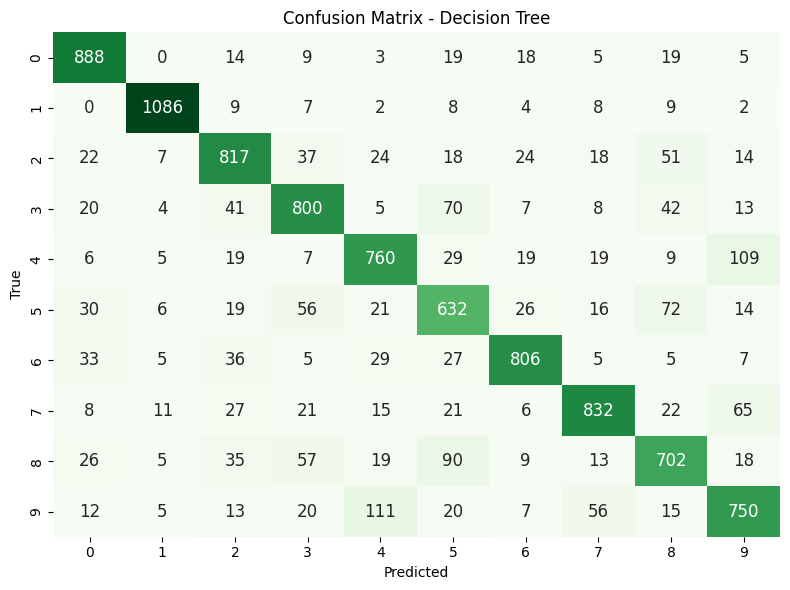

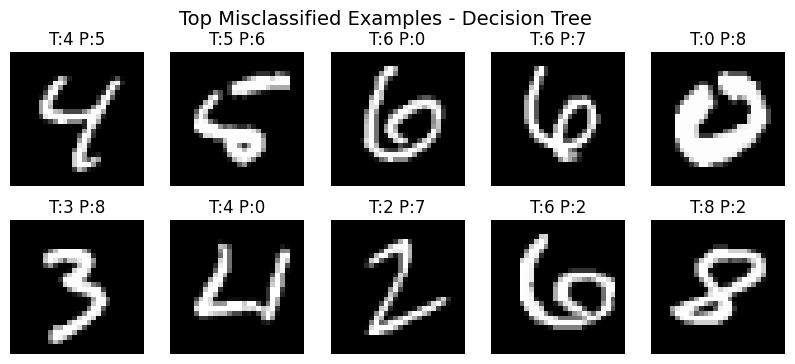

In [ ]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
X_train, y_train, X_test, y_test = load_mnist(normalise=True)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Use subset for speed
subset_size = 20000
X_train_sub = X_train_flat[:subset_size]
y_train_sub = y_train[:subset_size]

# PCA to reduce dimensionality
pca = PCA(n_components=100)  # choose number of components
X_train_pca = pca.fit_transform(X_train_sub)
X_test_pca = pca.transform(X_test_flat)

# Train
param_grid = {
    'max_depth': [20, 30],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'criterion': ['gini']
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=3, verbose=2)
start_train = time.time()
grid_search.fit(X_train_pca, y_train_sub)
end_train = time.time()

print(f"Best params: {grid_search.best_params_}")
print(f"Training time (GridSearch): {end_train - start_train:.2f} sec")

best_dt = grid_search.best_estimator_

# Predict
start_pred = time.time()
y_pred_dt = best_dt.predict(X_test_pca)
end_pred = time.time()

# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n Test Accuracy: {acc_dt:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", cbar=False, annot_kws={"size":12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

# Show misclassified examples
misclassified_idx = np.where(y_pred_dt != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_dt[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples - Decision Tree", fontsize=14)
plt.show()